In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df= df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = Sequential()

model.add(Dense(11, input_dim = 11, activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train_scaled,y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7438 - loss: 0.5536 - val_accuracy: 0.8000 - val_loss: 0.4598
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4450 - val_accuracy: 0.8087 - val_loss: 0.4337
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8109 - loss: 0.4251 - val_accuracy: 0.8194 - val_loss: 0.4158
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.4110 - val_accuracy: 0.8294 - val_loss: 0.4013
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8325 - loss: 0.3845 - val_accuracy: 0.8425 - val_loss: 0.3882
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8411 - loss: 0.3743 - val_accuracy: 0.8431 - val_loss: 0.3795
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8404 - loss: 0.3755 - val_accuracy: 0.8481 - val_loss: 0.3723
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8435 - loss: 0.3662 - val_accuracy: 0.

In [20]:
model.layers[0].get_weights()

[array([[ 1.7507091e-01, -3.7591442e-01, -2.0954771e-01, -5.4910004e-02,
         -1.2476352e-01, -3.3644527e-01, -5.9814040e-02,  2.2088803e-01,
          2.5154400e-01, -1.0504141e-01,  1.3462234e-01],
        [ 5.0545212e-02,  5.5410746e-02, -7.0798832e-01, -1.5649442e-01,
          3.1612152e-01,  1.5059005e-02, -6.4123464e-01, -4.9195307e-01,
         -7.6305747e-01,  3.0293578e-01,  4.4445175e-01],
        [-2.4430574e-01,  2.4448354e-02, -3.9407931e-02, -7.0213839e-02,
         -7.3187955e-02,  1.3667037e-01, -4.2163879e-02,  1.9786209e-02,
         -1.8212463e-01,  2.5305283e-01,  2.2829586e-01],
        [-2.9425675e-01,  2.0857669e-01, -1.0530763e-01,  4.2436466e-01,
          3.1990024e-01, -4.8930892e-01,  1.9345030e-02,  3.1367210e-01,
         -2.1573940e-01,  3.3992965e-02, -3.9458799e-01],
        [-8.3755785e-01,  4.0491059e-01,  8.5051584e-01,  1.1384146e+00,
          3.1423843e-01, -4.8507935e-01,  1.7845039e-01, -1.0313417e-01,
          5.5423200e-02,  4.5252171e-0

In [21]:
model.layers[1].get_weights()

[array([[ 0.08093281,  0.42737806,  0.38946757,  0.5759281 , -0.34553757,
          0.2779297 ,  0.5590274 ,  0.29152444, -0.32795492,  0.39234066,
         -0.14097661],
        [-0.30212244, -0.43346626,  0.48662227, -0.18400897, -0.09296714,
          0.09653578, -0.08699971,  0.21421377,  0.23130326, -0.21863371,
         -0.00315297],
        [-0.11464924, -0.41673115, -0.13185184,  0.08785069,  0.24290204,
         -0.3008471 , -0.03178379, -0.17510158,  0.38819045,  0.52390325,
          0.5529601 ],
        [-0.41547653, -0.04097749,  0.92470175, -0.7866308 ,  0.90635717,
          0.6152943 , -1.6773059 ,  0.5169989 ,  1.0386881 , -0.3359952 ,
         -0.07687512],
        [ 0.60273   , -0.0339625 , -0.53479165, -0.6780631 ,  0.1358677 ,
          0.1982986 , -0.01018048,  0.35299817, -0.37033516,  0.6038421 ,
          0.2572443 ],
        [-0.2452815 , -0.14759633,  0.32697165, -0.04993274, -0.38470727,
          0.46374583,  0.38470653, -0.10321861, -1.0191659 ,  0.3951811

In [22]:
model.layers[2].get_weights()

[array([[-0.46394253],
        [-0.62496287],
        [ 1.1321529 ],
        [ 0.3878762 ],
        [ 0.6192437 ],
        [ 0.22662488],
        [ 0.8698812 ],
        [ 0.61318165],
        [ 1.332162  ],
        [-0.42564306],
        [-0.6538406 ]], dtype=float32),
 array([-0.0671869], dtype=float32)]

In [23]:
ylog= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
y_pred= np.where(ylog > 0.5,1,0)

In [25]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [30]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()

<ipython-input-30-025b81ab23e0>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [31]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,1
1996,0,0
1997,1,1
1998,1,0


In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8515

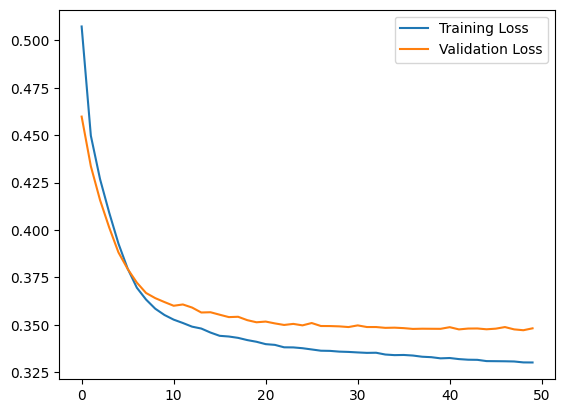

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

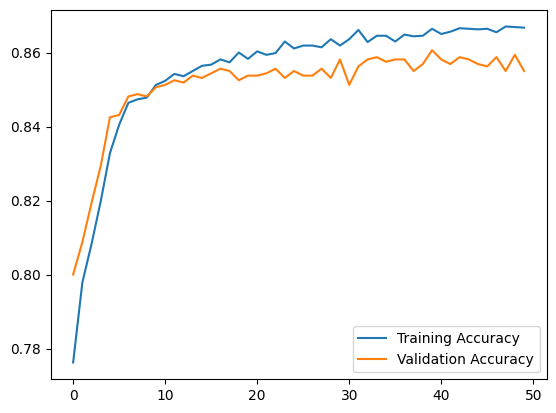

In [38]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()